In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

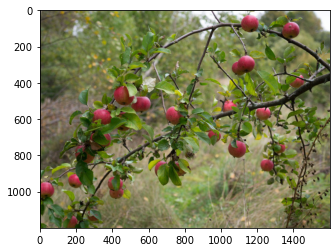

In [2]:
path = "appletree.jpg"

bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
raw_apples = image
plt.imshow(image)

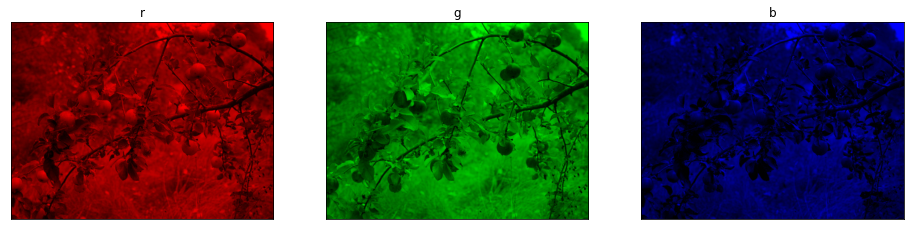

In [3]:
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1), plt.imshow(channel)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


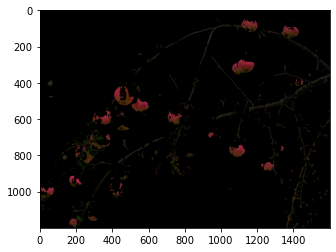

In [4]:
range_min = np.array([20, 0, 0])
range_max = np.array([255, 50, 100])
mask = cv2.inRange(image, range_min, range_max)
apples = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(apples)

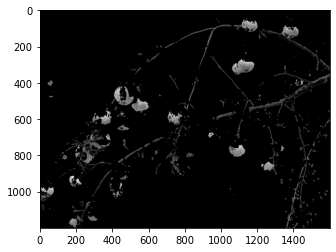

In [5]:
gray = cv2.cvtColor(apples, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap= "gray")

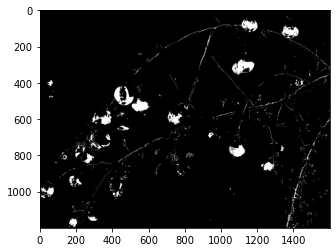

In [6]:
threshold = 40
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

3348


## Try Opening

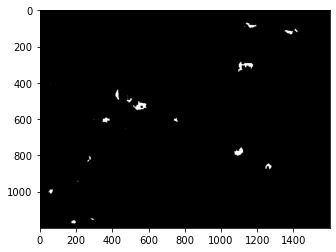

In [8]:
kernel = np.ones((12,12),np.uint8)

thresh_erode = cv2.erode(thresh, kernel, iterations = 1)
plt.imshow(thresh_erode, cmap = 'gray')

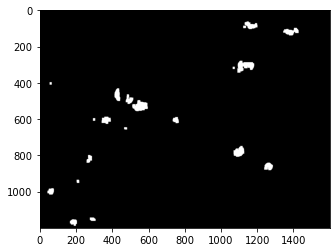

In [9]:
thresh_opening = cv2.dilate(thresh_erode, kernel, iterations = 1)
plt.imshow(thresh_opening, cmap='gray')

In [10]:
cnts = cv2.findContours(thresh_opening.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

20


## Try Closing

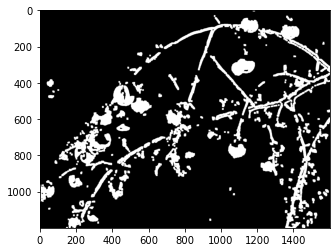

In [11]:
kernel = np.ones((9,9),np.uint8)

thresh_dilate = cv2.dilate(thresh, kernel, iterations = 1)
plt.imshow(thresh_dilate, cmap='gray')

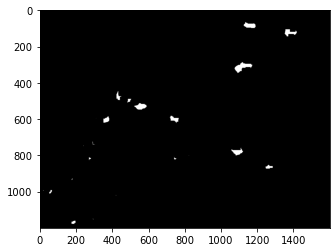

In [12]:
kernel = np.ones((10,10),np.uint8)


thresh_closing = cv2.erode(thresh_dilate, kernel, iterations = 3)
plt.imshow(thresh_closing, cmap = 'gray')

### Best Result - Opening

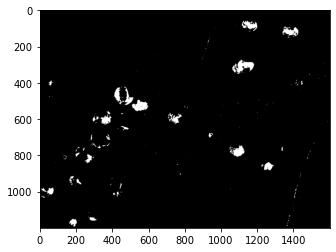

In [13]:
kernel = np.ones((3,3),np.uint8)

thresh_erode = cv2.erode(thresh, kernel, iterations = 1)
plt.imshow(thresh_erode, cmap = 'gray')

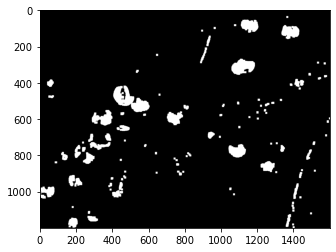

In [14]:
kernel = np.ones((11,11),np.uint8)

thresh_opening = cv2.dilate(thresh_erode, kernel, iterations = 1)
plt.imshow(thresh_opening, cmap='gray')

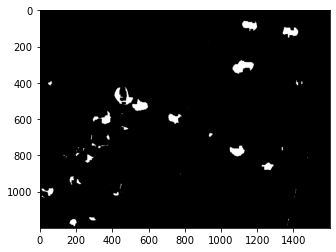

In [15]:
kernel = np.ones((3,3),np.uint8)

thresh_best = cv2.erode(thresh_opening, kernel, iterations = 6)
plt.imshow(thresh_best, cmap = 'gray')

# Changing color of apples to blue

Using the mask creating a blue image then bitwise and should do the trick.

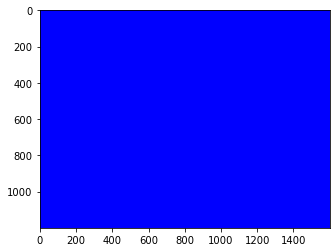

In [16]:
img_shape = image.shape[:-1]

maxed = np.ones(img_shape, dtype=np.uint8)*255
null = np.zeros(img_shape, dtype=np.uint8)

blue = cv2.merge([null,null,maxed])


plt.imshow(blue)

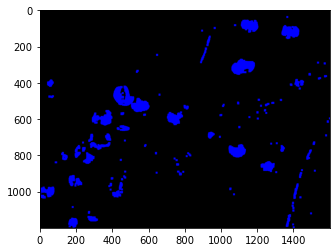

In [17]:
mask = thresh_opening.copy()
blue_apple_only = cv2.bitwise_and(blue, blue, mask=mask)
plt.imshow(blue_apple_only)

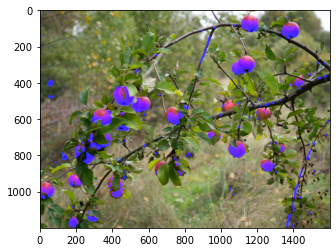

In [18]:
blue_apples = cv2.bitwise_or(image,blue_apple_only)
plt.imshow(blue_apples)

## Segmenting leaves

Its difficult because environment is also green

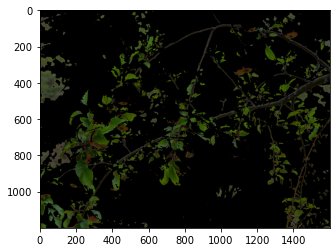

In [19]:
range_min = np.array([0, 0, 0])
range_max = np.array([80, 255, 100])
mask = cv2.inRange(image, range_min, range_max)
leaves = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(leaves)

# Part 2

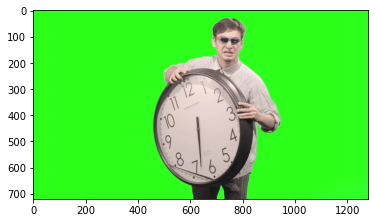

In [20]:
path = "ittsp.png"

bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
ittsp = image
plt.imshow(image)

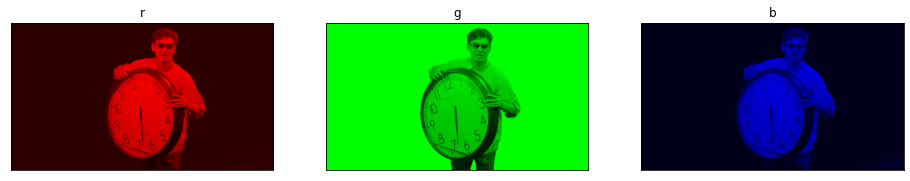

In [21]:
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(3):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
    plt.subplot(1,3,i+1), plt.imshow(channel)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [22]:
(b, g, r) = cv2.split(image)

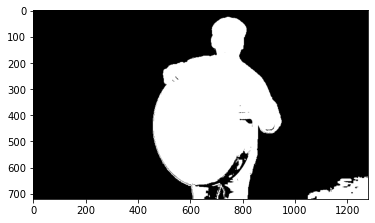

In [23]:
retR, threshR = cv2.threshold(r, 30, 255, cv2.THRESH_BINARY)
plt.imshow(threshR, cmap='gray')

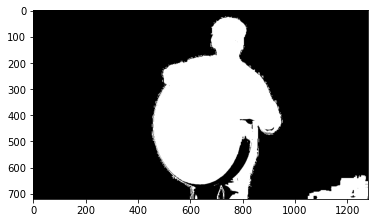

In [24]:
retB, threshB = cv2.threshold(b, 45, 255, cv2.THRESH_BINARY)
plt.imshow(threshB, cmap='gray')

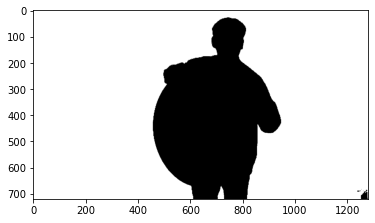

In [25]:
retG, mask_background = cv2.threshold(g, 254, 255, cv2.THRESH_BINARY)
plt.imshow(mask_background, cmap='gray')

retG, mask_foreground = cv2.threshold(g, 254, 255, cv2.THRESH_BINARY_INV)

Green gives the best siloutte.

Use the apples as background

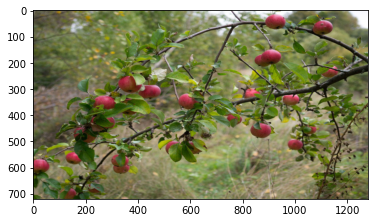

In [26]:
apples_resized =  cv2.resize(raw_apples, (1280,720))
plt.imshow(apples_resized)

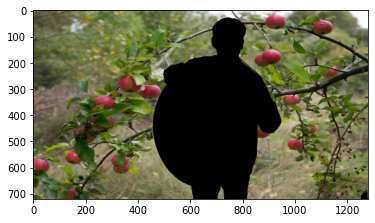

In [27]:
background = cv2.bitwise_and(apples_resized, apples_resized, mask = mask_background)

plt.imshow(background)

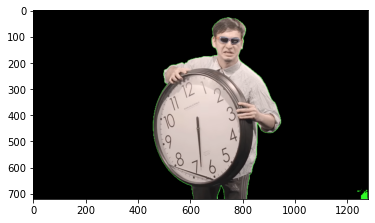

In [28]:
foreground = cv2.bitwise_and(ittsp, ittsp, mask = mask_foreground)
plt.imshow(foreground)

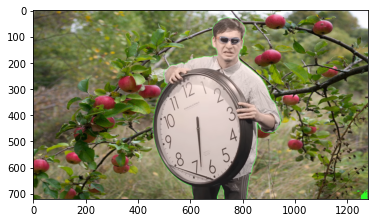

In [29]:
merged = cv2.bitwise_or(background,foreground)
plt.imshow(merged)

There is a bit green still, so I try some erosion to the edges smooth

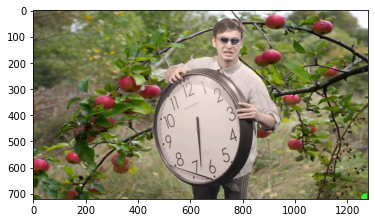

In [30]:
kernel = np.ones((5,5),np.uint8)

mask_foreground_fixed = cv2.erode(mask_foreground, kernel, iterations = 1)
mask_background_adjust = cv2.dilate(mask_background, kernel, iterations = 1)

foreground_fixed = cv2.bitwise_and(ittsp, ittsp, mask = mask_foreground_fixed)
background_adjust = cv2.bitwise_and(apples_resized, apples_resized, mask = mask_background_adjust)


merged_fixed = cv2.bitwise_or(background_adjust,foreground_fixed)
plt.imshow(merged_fixed)